In [4]:
#Implemented Decision Tree Algorithm.
#This Algorithm is used for classification of objects.
#Data-Set used in this program is Iris data-set.
#Link for dataset = http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

#get the dataset
from sklearn import datasets
iris = datasets.load_iris()

#get the features
import numpy as np
features = iris.data

#get target labels i.e classes.
labels = np.array(iris.target).reshape(-1,1)

print("Iris Dataset")
print("Features Shape = {}",format(features.shape))
print("Labels Shape = {}".format(features.shape))

print("\nSample Data :")
print("Example 1 : Features-{} , Labels-{}".format(features[0],labels[0]))

Iris Dataset
Features Shape = {} (150, 4)
Labels Shape = (150, 4)

Sample Data :
Example 1 : Features-[ 5.1  3.5  1.4  0.2] , Labels-[0]


In [5]:
#Get numbers of classes in the labels.
num_classes = np.unique(labels)
print(num_classes)

[0 1 2]


In [7]:
#Performing mean normalization ans feature scalling on the data.
#This helps the algorithm to converge faster.
print("Before Normalization :")
print(features[0:5])

for i in range(features.shape[1]):
    mean = features[:,i].mean()
    std = features[:,i].std()
    features[:,i] = (features[:,i]-mean)/std
    
print("\nAfter Normalization :")
print(features[0:5])

Before Normalization :
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]

After Normalization :
[[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673]
 [-1.50652052  0.10644536 -1.2844067  -1.31297673]
 [-1.02184904  1.26346019 -1.3412724  -1.31297673]]


In [51]:
#Using PCA to for Data Visualization.
#get PCA from sklearn.
from sklearn.decomposition import PCA

#reducing into 2 dimensions.
pca = PCA(n_components=2)

#fit 
pca.fit(features)

#make a copy of features
reduced_features = np.copy(features)

#apply transform on the copy
reduced_features = pca.transform(reduced_features)

print('Reduced Features :')
print(reduced_features[0:5])

print("\nOriginal Features :")
print(features[0:5])

Reduced Features :
[[-2.26454173  0.5057039 ]
 [-2.0864255  -0.65540473]
 [-2.36795045 -0.31847731]
 [-2.30419716 -0.57536771]
 [-2.38877749  0.6747674 ]]

Original Features :
[[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673]
 [-1.50652052  0.10644536 -1.2844067  -1.31297673]
 [-1.02184904  1.26346019 -1.3412724  -1.31297673]]


In [54]:
#Separate data points for different classes.
label_dict = {0:[],1:[],2:[]}
for i,row in enumerate(reduced_features):
    label_dict[int(labels[i])].append(row) 
    
#convert into np.array
label_dict[0] = np.array(label_dict[0]).reshape(-1,2)
label_dict[1] = np.array(label_dict[1]).reshape(-1,2)
label_dict[2] = np.array(label_dict[2]).reshape(-1,2)

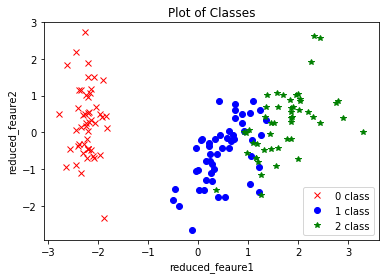

In [55]:
#Plottting Different labels
import matplotlib.pyplot as plt
plt.figure()
plt.plot(label_dict[0][:,0],label_dict[0][:,1],'rx',label='0 class')
plt.plot(label_dict[1][:,0],label_dict[1][:,1],'bo',label='1 class')
plt.plot(label_dict[2][:,0],label_dict[2][:,1],'g*',label='2 class')
plt.xlabel("reduced_feaure1")
plt.ylabel("reduced_feaure2")
plt.title("Plot of Classes")
plt.legend()
plt.show()

In [57]:
#Implementing Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()

#fit the data
dec_tree.fit(features,labels)

#Accuracy
print('Accuracy : {}%'.format(dec_tree.score(features,labels)*100))

Accuracy : 100.0%
